In [1]:
import numpy as np
import operator

In [2]:
def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
createDataSet()

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]), ['A', 'A', 'B', 'B'])

In [4]:
# 取前k个距离最近的点
def classify0(inX, dataSet, labels, k):
    m = dataSet.shape[0]
    data = np.tile(inX, (m, 1)) - dataSet
    data = data ** 2
    # 计算x^2 + y^2
    dist = data.sum(axis = 1)
    dist = dist ** (1 / 2)
    dist_arg = dist.argsort()
    m = {}
    for i in range(k):
        m[labels[dist_arg[i]]] = m.get(labels[dist_arg[i]], 0) + 1
    classCnt = sorted(m.items(), key = operator.itemgetter(1))
    return classCnt[-1][0]  

In [5]:
group, labels = createDataSet()
classify0([0, 0], group, labels, 3)

'B'

In [6]:
inX = [0, 1]
np.tile(inX, (3, 2))

array([[0, 1, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 1]])

In [7]:
# 读取文件内容
def file2matrix(filename):
    fr = open(filename)
    lines = fr.readlines()
    n = len(lines)
    data = np.zeros((n, 3))
    label = []
    index = 0
    for line in lines:
        line.strip()
        nums = line.split("\t")
        data[index] = nums[0:3]
        label.append(int(nums[-1]))
        index += 1
    return data, label

In [8]:
data, label = file2matrix('datingTestSet2.txt')
print(data)
print(label)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 

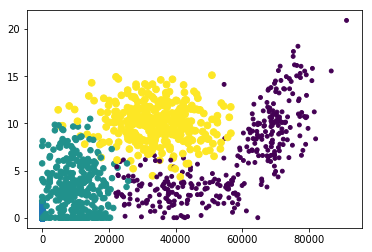

In [35]:
import matplotlib
import matplotlib.pyplot as plt
figure = plt.figure()
# 111指画图的长宽尺寸
ax = figure.add_subplot(111)
# ax.scatter(data[:, 1], data[:, 2])
ax.scatter(data[:, 0], data[:, 1], 15.0 * np.array(label), 15.0 * np.array(label))
plt.show()

In [74]:
# 归一化数据
def autoNorm(data):
    minn = data.min(axis = 0)
    maxx = data.max(axis = 0)
    ranges = maxx - minn
    res = np.zeros(data.shape)
    m = data.shape[0]
    res = data - np.tile(minn, (m, 1))
    res = res / np.tile(ranges, (m, 1))
    return res, ranges, minn

In [77]:
res, ranges, minVals = autoNorm(data)
print(res)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


In [82]:
# 1 : 9 测试
def datingClassTest():
    testRatio = 0.10
    data, label = file2matrix('datingTestSet2.txt')
    norm, ranges, minVals = autoNorm(data)
    m = data.shape[0]
    testNum = int(testRatio * m)
    errorCNT = 0
    for i in range(testNum):
        res = classify0(norm[i, :], norm[testNum:m, :], label[testNum : m], 3)
#         print(f"the classifier came back with {res}, the real answer is {label[i]}")
        if res != label[i]:
            errorCNT += 1
    print(f"the total error rate is {errorCNT * 1.0 / m}")

In [83]:
datingClassTest()

the total error rate is 0.005


In [88]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("percentage of playing vedio games?"))
    ffMiles = float(input('frequent flier miles per year?'))
    iceCream = float(input('liters of ice cream consumed per year?'))
    data, label = file2matrix('datingTestSet2.txt')
    norm, ranges, minVals = autoNorm(data)
    arr = np.array([ffMiles, percentTats, iceCream])
    res = classify0((arr - minVals) / ranges, norm, label, 3)
    print(f"you will probably like this person : {resultList[res - 1]}")

In [89]:
classifyPerson()

percentage of playing vedio games?12
frequent flier miles per year?12
liters of ice cream consumed per year?12
you will probably like this person : in small doses
